In [26]:
import pandas as pd
import seaborn as sns

from sklearn import datasets

import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d

from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap

In [6]:
def generate_manifold(method, n = 1000):
    
    x, color = method(n_samples = n)
    
    print("Shape of data:", x.shape)
    print("Color values:", color.shape)

    print()
    print("Sample data : \n")
    
    x = pd.DataFrame(x)
    
    print(x.sample(10))
    
    ax = plt.subplots(figsize = (10, 8))
    ax = plt.axes(projection = "3d")
    
    ax.scatter3D(x[0], x[1], x[2], c = color, cmap = plt.cm.Spectral)
    
    return x, color

Shape of data: (1000, 3)
Color values: (1000,)

Sample data : 

            0         1         2
348  0.055542  0.985117 -0.001544
573  0.983874  0.874350 -1.178866
809 -0.309460  1.446612  0.049087
758 -0.943793  0.063527  1.330537
975  0.012880  0.902039 -1.999917
136  0.880694  1.815793 -1.473686
874 -0.943756  0.269115  1.330643
590  0.278893  1.786850  1.960322
444 -0.999464  0.448359  0.967248
102 -0.631953  1.543475 -1.775007


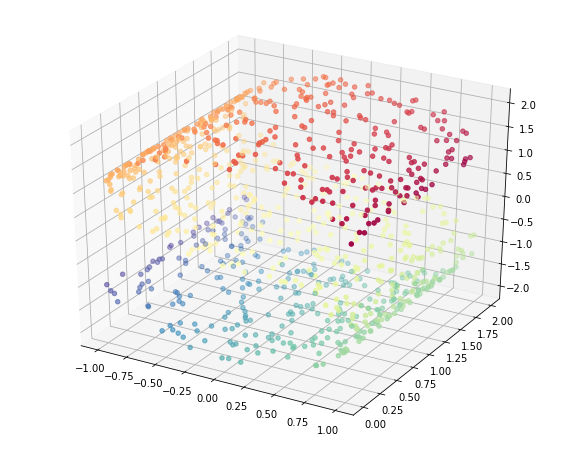

In [7]:
x, color = generate_manifold(datasets.make_s_curve)

In [8]:
def perform_manifold_learning(x, method):
    
    x = method.fit_transform(x)
    
    print("New shape of data :", x.shape)
    
    x = pd.DataFrame(x)
    
    ax = plt.subplots(figsize = (12, 10))
    plt.axis("equal")
    
    plt.scatter(x[0], x[1], c = color, cmap = plt.cm.Spectral)
    plt.xlabel("x[0]")
    plt.ylabel("x[1]");
    
    return method

### Multi-dimensional scaling

Reduce dimensionality of your data while trying to preserve the distance between instances. The original distance in the higher dimensional space is maintained (as far as possible) in the lower dimensional space.

Non-metric multidimensional scaling, similar to a regression technique called isotonic regression where the fitted curve is not a straight line. Non-parametric technique where the data is ranked (the order matters but not the magnitude of the values)

New shape of data : (1000, 2)


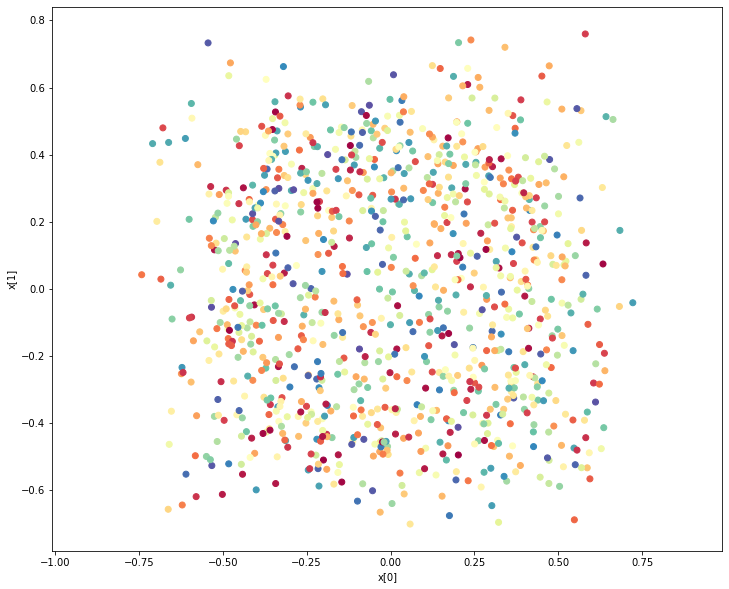

In [11]:


mds = perform_manifold_learning(x, MDS(n_components = 2, metric = False))

Metric-MDS tries to minimize the mean square loss while performing MDS. Similar to MSE regression. Often used when the distance between the data points in the higher dimensional space is meaningful, its not just the order that matters, but also the values.

New shape of data : (1000, 2)


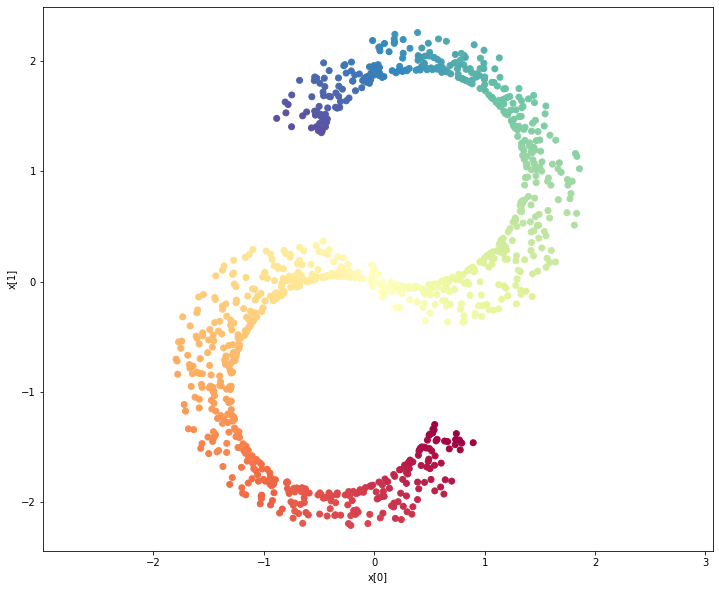

In [14]:
mds = perform_manifold_learning(x, MDS(n_components = 2, metric = True))

### T-distributed Stochastic Neighbor Embedding

Keeps similar instances close together and dissimilar instances apart. By default uses the Euclidean distance between points as a meansure of similarity, but can use other similarity measures as well.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html

New shape of data : (1000, 2)


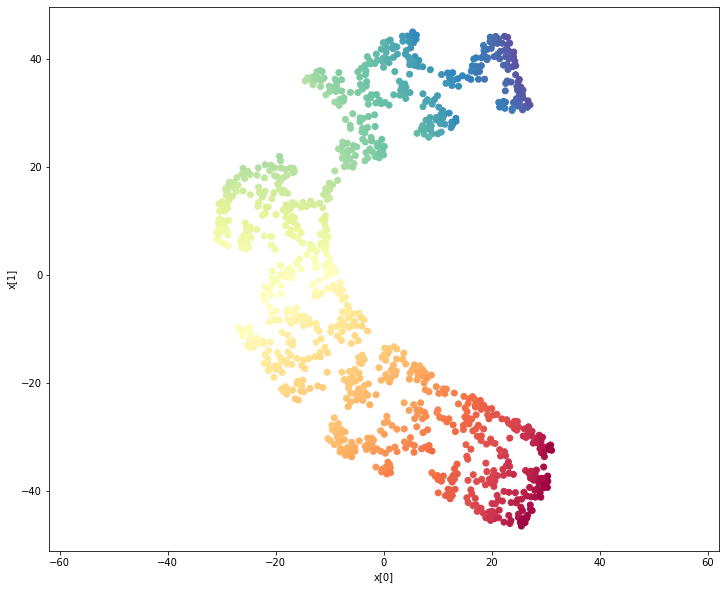

In [17]:
tsne = perform_manifold_learning(x, TSNE(n_components = 2))

New shape of data : (1000, 2)


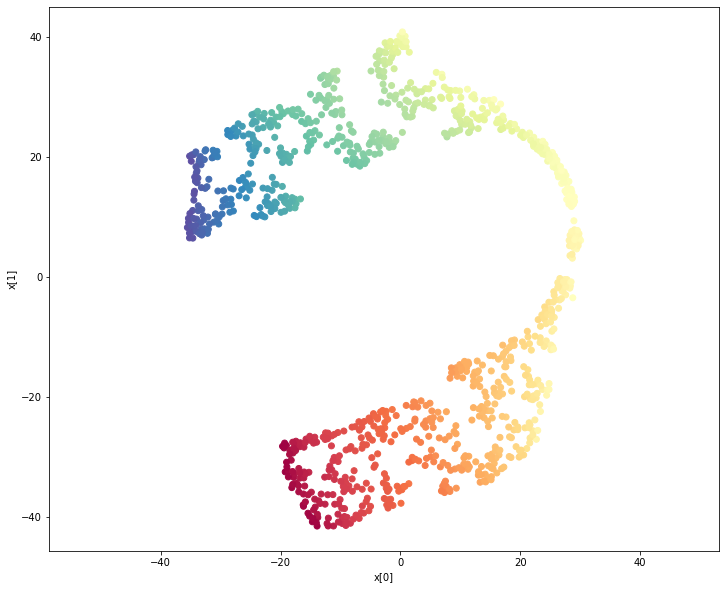

In [19]:
tsne = perform_manifold_learning(x, TSNE(n_components = 2, metric="cosine"))

### Locally linear embedding

Measures local relationships i.e. how each data point is related to its closest neighbors, and then tries to find a lower dimensionality representation of the data that preserves these local relationships.

**standard** algorithm scales poorly to large datasets, and shapes in the lower dimension get distorted

New shape of data : (1000, 2)


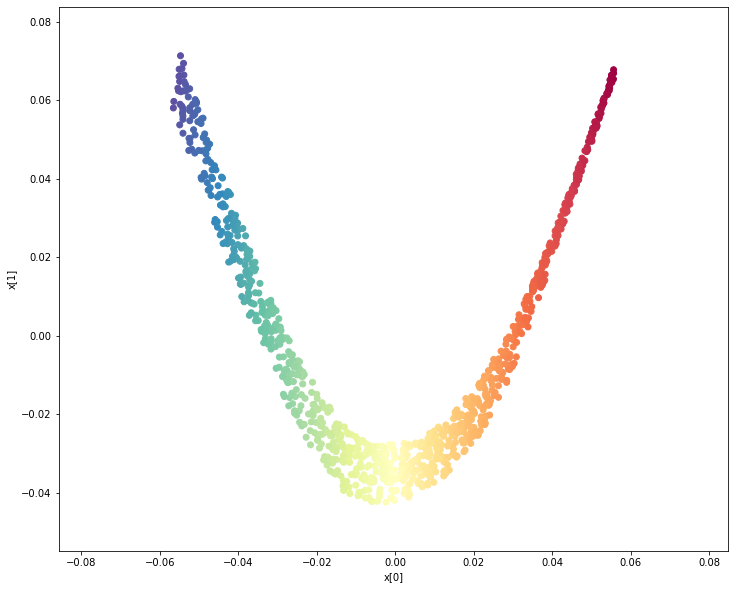

In [23]:
lle = perform_manifold_learning(x, LocallyLinearEmbedding(n_neighbors = 20, 
                                                          n_components = 2, method = "standard"))

**modified** overcomes the drawbacks in the standard algorithm, the numerical procedure reduces distortion in the lower dimensional space

New shape of data : (1000, 2)


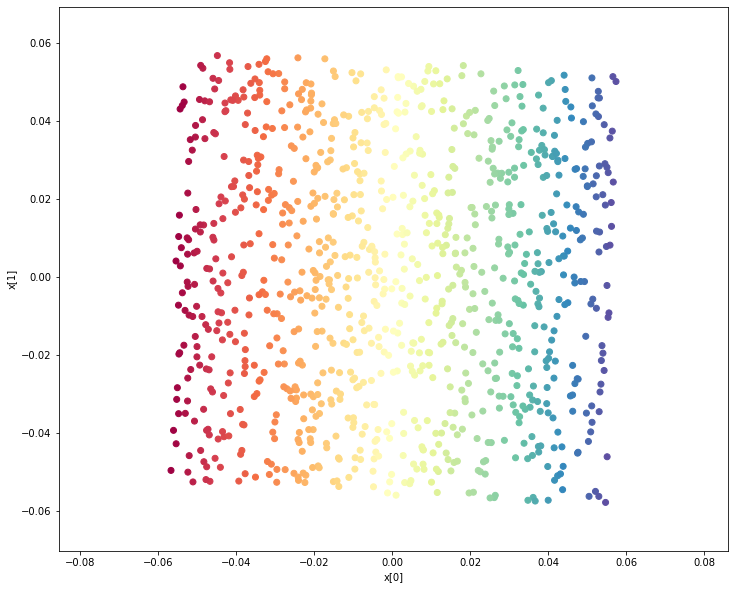

In [24]:
lle = perform_manifold_learning(x, LocallyLinearEmbedding(n_neighbors = 20, 
                                                          n_components = 2, method = "modified"))

**hessian** has a different numerical procedure, more complex to compute, performs better than the 'standard' LLE but is more complex than the 'modified' LLE

New shape of data : (1000, 2)


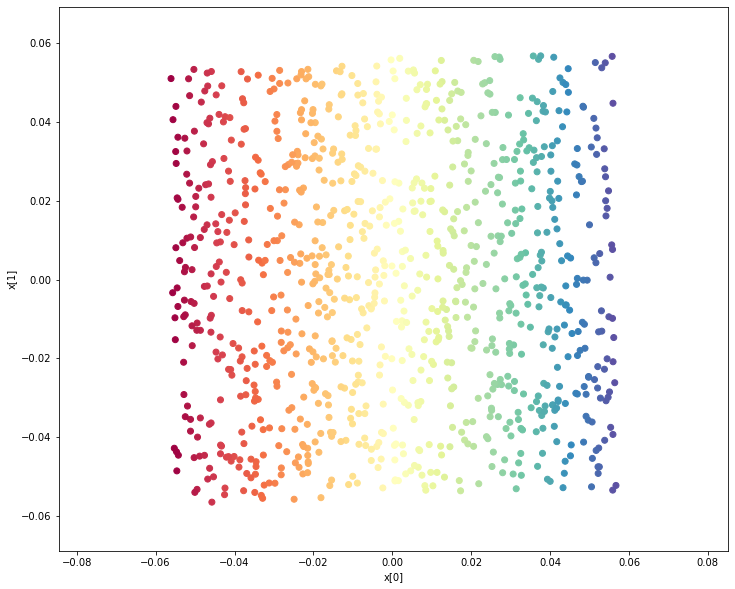

In [25]:
lle = perform_manifold_learning(x, LocallyLinearEmbedding(n_neighbors = 20, 
                                                          n_components = 2, method = "hessian"))

### Isomap

Reduces dimensionality by preserving geodesic distances, i.e. distances along a curve

New shape of data : (1000, 2)


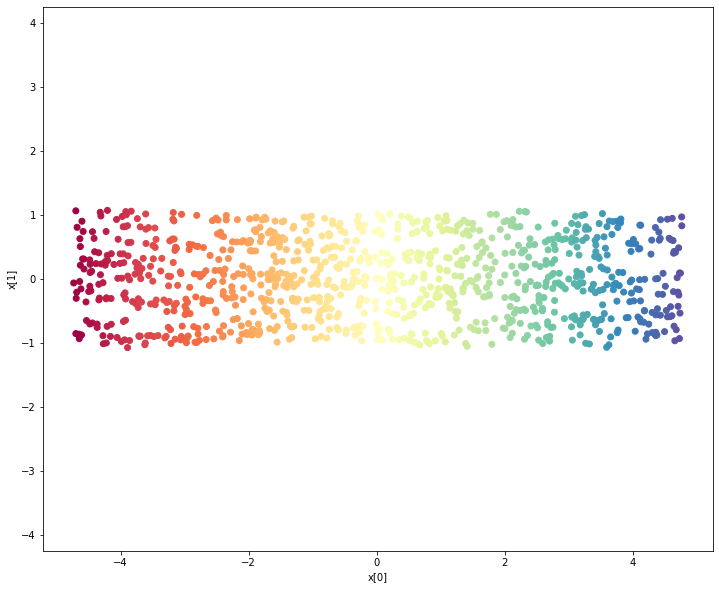

In [27]:
isomap = perform_manifold_learning(x, Isomap(n_neighbors = 15, n_components = 2))